
<h1><center>Analyzing Employee exit surveys </center> 
<h3> <center> Analyzing dissatisafaction amongst leaving employees of DETE and TAFE Institutes</center></h3>

The goal of the project is to analyze the Exit Surveys collected from the Employees of Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.<br>

The Department of Employment, Education and Training was an Australian government department that existed between July 1987 and March 1996. At its creation, the Department was responsible for the following:

   * Education, other than migrant adult education
   * Youth Affairs
   * Employment and training
   * Commonwealth Employment Service
   * Labour market programs
   * Co-ordination of research policy
   * Research grants and fellowships

In Australia, technical and further education or TAFE institutions provide a wide range of predominantly vocational courses, mostly qualifying courses under the National Training System/Australian Qualifications Framework/Australian Quality Training Framework. Fields covered include business, finance, hospitality, tourism, construction, engineering, visual arts, information technology and community work.

The purpose of the analysis is to answer the following questions - <br>

   1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

   2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The datasets from both the institutes are surveys collected from the out going employees. They have large number of columns, predominantly columns that are questions asked to the employees and the answer either boolean or on the `Likert` scale. A few of the columns, enough to get started, from both the datasets are described below:- 

dete_survey.csv 's :

    ID: An id used to identify the participant of the survey
    SeparationType: The reason why the person's employment ended
    Cease Date: The year or month the person's employment ended
    DETE Start Date: The year the person began employment with the DETE
tafe_survey.csv 's :

    Record ID: An id used to identify the participant of the survey
    Reason for ceasing employment: The reason why the person's employment ended
    LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

In [2]:
df_dete = pd.read_csv('dete_survey.csv')
df_tafe = pd.read_csv('tafe_survey.csv')

In [3]:
df_dete.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
df_tafe.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
df_dete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [6]:
df_tafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
df_dete.isna().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
df_tafe.isna().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

The data in Dete Survey contains several missing values,but instead given as - 'Not Stated', This infact is NaN. Thus to rectify this, the dataset is read into `pandas` again with the `na_values` parameter set to 'Not Stated'. This will convert every occurence of 'Not Stated' to NaN value.

In [9]:
df_dete = pd.read_csv('dete_survey.csv',na_values='Not Stated')

After analyzing the column names in the Dete Survey dataset the columns *Professional Development* to *Health & Safety* (28:49) are not required for the analysis. This data is general employee survey data regarding the employee's engagement with the company on the Likert scale. Since the purpose is to find dissatisfied employees and which employee is likely to report dissatisafaction, the engagement of employee with the institute is not relevant for now. 

In [10]:
df_dete.iloc[:,28:49].head(5)
df_dete.drop(columns=df_dete.columns[28:49],axis=1,inplace=True)

On similar lines, the Tafe Survey dataset contains the columns *Main Factor. Which of these was the main factor for leaving?* to *Workplace. Topic:Would you recommend the Institute as an employer to others?* (17:66) are irrelevant to the analysis, as this data is of employee's engagement with the institute on the Likert scale.

In [11]:
df_tafe.iloc[:,17:66].head(5)
df_tafe.drop(columns=df_tafe.columns[17:66],axis=1,inplace=True)

For the ease of analysis and eventually combining both datasets for inference later, the columns names are cleaned made uniform across both the datasets (the columns common between the two).

In [12]:
columns = df_dete.columns.str.replace(" ","_").str.lower().str.strip()
df_dete.columns = columns

In [13]:
new_name = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

df_tafe.rename(new_name,inplace=True,axis=1)

The *separationtype* column in both the datasets holds the reason why an employee left the institute. For the given analysis, the label 'Resignation' only is relevant, since we are interested in employees who resigned due to dissatisfaction. The datasets are reduced to only employees who have resigned.

In [14]:
df_dete.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [15]:
df_tafe.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [16]:
df_dete = df_dete[df_dete.separationtype.str.contains('Resignation')].copy()
df_tafe = df_tafe[df_tafe.separationtype == 'Resignation'].copy()

The *cease_date* column indicates the last date the employee worked for or basically resignation date. These columns are in both the sets and hence have to be made uniform.<br>
All NaN values are removed and only the year is maintained rather than the exact date or month.

In [17]:
df_tafe.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [18]:
df_dete.cease_date.value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [19]:
df_dete = df_dete[~df_dete.cease_date.isna()]

In [20]:
def clean_date(row):
    if '/' in row:
        return row.split('/')[1]
    else:
        return row

df_dete.cease_date = df_dete.cease_date.apply(clean_date).astype(float)

In [21]:
df_dete.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

The *end_date* and *start date* columns give the period the employee has worked for the insitute. The assumption can be made - The start dates shouldn't be greater than current date and the start date shouldn't be previous to  1970 given that people are usually employed in their 20s.<br>
Future dates are obviously out of question and for dates previous to 1970 means that given the person was employed in 20s the current age of the person would be 70+, which is usually the retirement age. For these reasons, the lower limit has been set to 1970.<br>

A box plot is a good way to catch outiers if any and to view general distribution of the data.

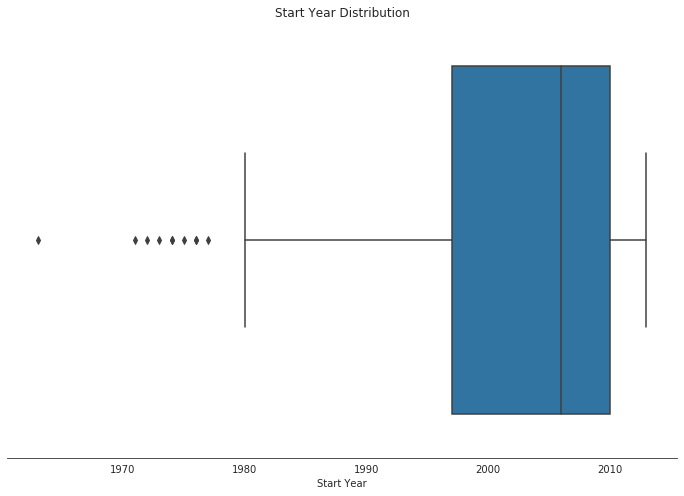

In [22]:
plt.figure(figsize=(12,8))
sns.set_style('white')
sns.boxplot(df_dete.dete_start_date)
plt.xlabel('Start Year')
plt.title("Start Year Distribution")
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

The distribution contains one entry with the year 1963 which is previous to the stipulated lower bound. Hence the removal of the outlier.

In [23]:
df_dete = df_dete[~(df_dete.dete_start_date == 1963.0)]

The Tafe Survey dataset's column *institute_service* describes the service years of employees. This column does not exist for the Dete Survery dataset. <br>
To deduce this column, 'cease_date' and 'dete_start_date' can be used. The subtraction of the two columns results in the length of service of an employee. The rows with null values are dropped for convenience.

In [24]:
df_tafe.institute_service.value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [25]:
df_dete = df_dete[~df_dete.dete_start_date.isna()]

In [26]:
df_dete['institute_service'] = abs(df_dete.cease_date - df_dete.dete_start_date)

The purpose of the project is to understand which employees are dissatisfied. For this we have the following column relevant to us :

In the Tafe Survey dataset - 
    
    Contributing Factors. Dissatisfaction
    Contributing Factors. Job Dissatisfaction

In the Dete Survey dataset - 
    
    job_dissatisfaction
    dissatisfaction_with_the_department
    physical_work_environment
    lack_of_recognition
    lack_of_job_security
    work_location
    employment_conditions
    work_life_balance
    workload

From the above columns, we can infer that each column talks about dissatisafaction of an employee. Any one of them being true indicates the employee has resigned (already filtered) due to dissatisfaction of some sorts. A new column is created in both the datasets indicating afore-mentioned employee.

In [27]:
df_tafe[['Contributing Factors. Dissatisfaction'
        ,'Contributing Factors. Job Dissatisfaction']]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
...,...,...
696,-,-
697,-,-
698,-,-
699,-,-


The '-' value in these columns simply stands for not answered which can be concluded as `False`. Similarly, if the question was answered it indicates that there was dissatisfaction related to the employement. Hence for ease of compiling the data and making the afore-mentioned column, these columns will be cleaned and converted to boolean.

In [28]:
df_dete[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
807,False,True,False,False,False,False,False,True,False
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False


In [29]:
print(df_tafe['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

def clean_factors(row):
    if row == '-':
        return False
    elif pd.isnull(row):
        return np.NaN
    else:
        return True

df_tafe['Contributing Factors. Dissatisfaction'] = df_tafe['Contributing Factors. Dissatisfaction'].apply(clean_factors)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


In [30]:
print(df_tafe['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))
df_tafe['Contributing Factors. Job Dissatisfaction'] = df_tafe['Contributing Factors. Job Dissatisfaction'].apply(clean_factors)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Using the `DataFrame.any()` function, the columns are compiled along the rows i.e. if any value along a row for these columns is `True`, then the *dissatisfied* column takes a `True` value.

In [31]:
df_dete['dissatisfied'] = df_dete[[
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
]].any(axis=1,skipna=False)

In [32]:
df_tafe['dissatisfied'] = df_tafe[[
    'Contributing Factors. Dissatisfaction',
    'Contributing Factors. Job Dissatisfaction'
]].any(axis=1,skipna=False)

The cleaning and identification of dissatisfied employees is concluded for both the datasets individually. For further analysis, the datasets need to be combined, to find a generalized trend in terms of dissatisfaction. <br>
To differentiate between the rows of the two datasets - *df_dete* and *df_tafe*, a new column is created, identifying the institute.

In [33]:
df_dete['institute'] = 'DETE'
df_tafe['institute'] = 'TAFE'

The *institute_service* columns in both the datasets do not match. In the DETE dataset, these values are on the interval scale, where as for the TAFE column these are on an ordinal scale. For uniformity, the DETE dataset column is converted to an ordinal scale with the labels :

   * Less than 1 year
   * 1-2
   * 3-4
   * 5-6
   * 7-10
   * 11-20
   * More than 20 years

These labels are derived from the TAFE dataset.

In [34]:
bins = pd.IntervalIndex.from_tuples([
    (-1,0),(1,2),(3,4),(5,6),(7,10),(11,20),(21,100)
],
    closed='both'
)

tmp = pd.cut(
    x=df_dete.institute_service,
    bins=bins
)

In [35]:
def assign_labels(row):
    if row == pd.Interval(0,1,closed='both'):
        return 'Less than 1 year'
    elif row == pd.Interval(1,2,closed='both'):
        return '1-2'
    elif row == pd.Interval(3,4,closed='both'):
        return '3-4'
    elif row == pd.Interval(5,6,closed='both'):
        return '5-6'
    elif row == pd.Interval(7,10,closed='both'):
        return '7-10'
    elif row == pd.Interval(11,20,closed='both'):
        return '11-20'
    else:
        return 'More than 20 years'

df_dete.institute_service = tmp.apply(assign_labels)

The datasets are finally uniform in terms of the common column. Since the relevant columns for the analysis have been cleaned or derived, all other columns are irrelevant now and hence are removed before joining the datasets.<br>

The relevant columns are:-
   * institute_service
   * gender
   * age
   * employment_status
   * position
   * cease_date
   * dissatisfied
   * id
   * separationtype
   * institute

In [36]:
relevant_cols = ['institute_service','gender','age','employment_status',
                'position','cease_date','dissatisfied','id',
                'separationtype','institute']

In [37]:
df_tafe = df_tafe[relevant_cols]
df_dete = df_dete[relevant_cols]

In [38]:
df = pd.concat([df_dete,df_tafe])

In [39]:
df.head(5)

,institute_service,gender,age,employment_status,position,cease_date,dissatisfied,id,separationtype,institute
3,7-10,Female,36-40,Permanent Full-time,Teacher,2012.0,False,4.0,Resignation-Other reasons,DETE
5,11-20,Female,41-45,Permanent Full-time,Guidance Officer,2012.0,True,6.0,Resignation-Other reasons,DETE
8,3-4,Female,31-35,Permanent Full-time,Teacher,2012.0,False,9.0,Resignation-Other reasons,DETE
9,11-20,Female,46-50,Permanent Part-time,Teacher Aide,2012.0,True,10.0,Resignation-Other employer,DETE
11,3-4,Male,31-35,Permanent Full-time,Teacher,2012.0,False,12.0,Resignation-Move overseas/interstate,DETE


The datasets are concatenated to form one dataset with the columns afore mentioned. The *institute_service* column is uniform, but not exactly intuitive, hence the column is further binned and categorized into the following :
    
    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

These categories are intuitive and easy to understand. The previous labels did show the limits and hence conveyed more data but in terms of analysis, that is very granular and a technical jargon.<br>

NOTE : The service length (category) of an employee does not infer the age of the employee. The employee can be New (recently joined the institute) and yet be quite old in terms of age.

In [40]:
def service_catgs(row):
    if row in ['Less than 1 year','1-2']:
        return 'New'
    elif row in ['3-4','5-6']:
        return 'Experienced'
    elif row == '7-10':
        return 'Established'
    elif pd.isnull(row):
        return np.NaN
    else:
        return 'Veteran'
    
df['service_catg'] = df.institute_service.apply(service_catgs)

The questions to be answered via this analysis were:- 
   1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

   2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
   
For the analysis we have coagulated the service lengths for each employee into a column *service_catg*. This column is now compared with the previously derived column *dissatisfied*. The end goal is to understand which serive category in general shows dissapointment in the employement and hence resigned.

In [41]:
print(df.dissatisfied.value_counts(dropna=False))
df.dissatisfied.fillna(False,inplace=True)

False    376
True     228
NaN        8
Name: dissatisfied, dtype: int64


In [42]:
catg_percent= df.pivot_table(
    values='dissatisfied',
    index='service_catg'
)
catg_percent.reset_index(inplace=True)
catg_percent = catg_percent.iloc[[2,1,0,3]]
catg_percent

,service_catg,dissatisfied
2,New,0.265896
1,Experienced,0.343023
0,Established,0.516129
3,Veteran,0.496774


The `pivot_table` function is used with the default `numpy.meam` as the aggregate function. This grouped the data by *service_catg* and aggregated the *disstatisfied* column. Since the *dissatisfied* is boolean, the mean is nothing but the proportion of `True` values for that group.

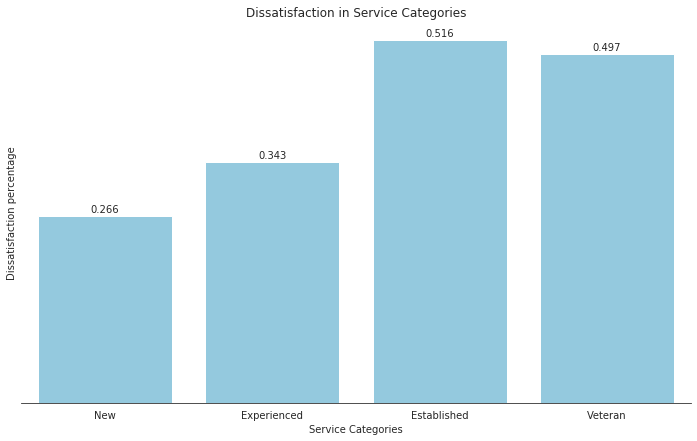

In [43]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='service_catg',
    y='dissatisfied',
    data=catg_percent,
    color='skyblue'
)
plt.yticks([])
plt.xlabel("Service Categories")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction in Service Categories")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )


Plotting the resulting proportions obtained, the following conclusion can be drawn:- 
* The employees of service categories - 'Established' and 'Veteran' in general show dissatisfaction than the others.
* The employees just starting their new job i.e. 'New' category in general have lower dissatisfaction rates. Maybe since they have just joined.

The conclusion made above categorizes which employee is more likely to be dissatisfied and resign. The service lenghts are just one aspect of it. There are various aspects to an employee. One such aspect is the age, analogous to service categories. Using the age in a similar way as service category, the aim is to find categories that more likely to be dissatisfied and resign.<br>

The *age* column is on the ordinal scale but the labels are intervals and less inuitive. To make the comparision easier, the *age* is converted to the labels given below :

    Young: Aged 20 or younger to 30
    Middle: Aged 31 to 45
    Senior: Aged 46 to 55
    Elder: Aged 56 or older

These catgories are intuitive and are easier to compare than the previous labels    
    

In [44]:
df.age.value_counts(dropna=False)

51-55            69
NaN              52
41  45           45
41-45            44
46  50           39
36-40            36
46-50            34
21  25           33
36  40           32
26  30           32
31  35           32
26-30            31
56 or older      29
31-35            29
21-25            26
56-60            22
61 or older      17
20 or younger    10
Name: age, dtype: int64

In [45]:
df.age = df.age.str.replace("  ","-")
df.age = df.age.str.replace("56 or older","56-60")

def age_catg(row):
    if row in ['20 or younger','21-25','26-30']:
        return 'Young'
    elif row in ['31-35','36-40','41-45']:
        return 'Middle'
    elif row in ['46-50','51-55']:
        return 'Senior'
    elif pd.isna(row):
        return np.NaN
    else:
        return 'Elder'
    
df['age_catg'] = df.age.apply(age_catg)

In [46]:
print(df.age_catg.value_counts(dropna=False))

Middle    218
Senior    142
Young     132
Elder      68
NaN        52
Name: age_catg, dtype: int64


The *age* still contains NaN values. These values cannot be imputed from any available data.<br>

Similar to *service_catg*, the `pivot_table` function is used on the *age* and *dissatisfied* columns to retrieve the proportions of dissatisfied reignations amongst employees for each age category.

In [47]:
age_catg_percent = df.pivot_table(index='age_catg',values='dissatisfied')
age_catg_percent.reset_index(inplace=True)
age_catg_percent = age_catg_percent.iloc[[3,1,2,0]]
age_catg_percent

,age_catg,dissatisfied
3,Young,0.340909
1,Middle,0.376147
2,Senior,0.408451
0,Elder,0.426471


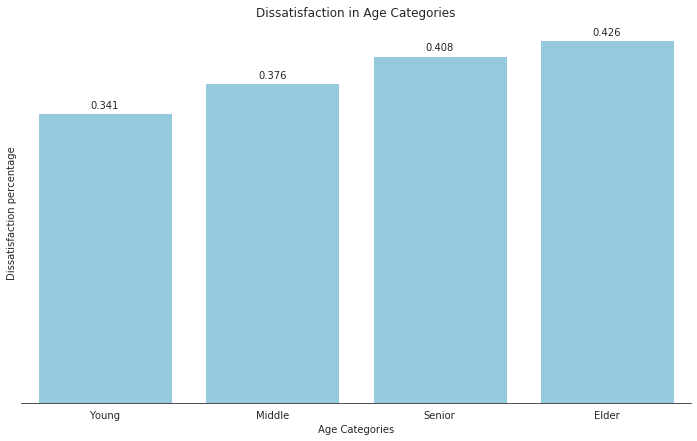

In [48]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='age_catg',
    y='dissatisfied',
    data=age_catg_percent,
    color='skyblue'
)
plt.yticks([])
plt.xlabel("Age Categories")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction in Age Categories")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )
#splt.annote("bar text",(loc_x,loc_y),ha(horizontal allign),va(vertical allign))


The following conclusions can be made from the resulting plot:-

* The employees of the 'Senior' and 'Elder' age category are likely to be dissatisfied and resign than the others.
* The 'Young' employees are less likely to be dissatisfied. Maybe since its the start of their career.

Uptil now the analysis has focused on the mainly the temporal aspects of the employee. Since there are two institutes under analysis, the comparision between the two institutes in terms of having dissatiesfied employees can give a peak at how the institute engages with its employees.<br>

Between the two institutions - DETE and TAFE, using `pivot_table` function, proportion of dissatisfied employees is found.

In [49]:
df.institute.value_counts(dropna=False)

TAFE    340
DETE    272
Name: institute, dtype: int64

In [50]:
institute_catg = df.pivot_table(index='institute',values='dissatisfied')
institute_catg.reset_index(inplace=True)
institute_catg

,institute,dissatisfied
0,DETE,0.503676
1,TAFE,0.267647


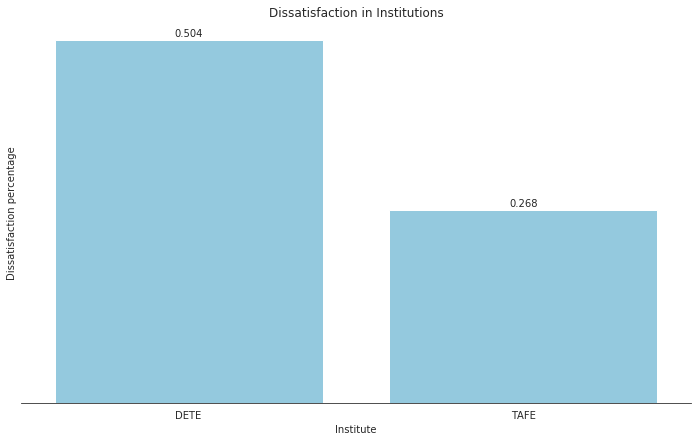

In [51]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='institute',
    y='dissatisfied',
    data=institute_catg,
    color='skyblue'
)
plt.yticks([])
plt.xlabel("Institute")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction in Institutions")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )
#splt.annote("bar text",(loc_x,loc_y),ha(horizontal allign),va(vertical allign))


From the results, the plot concludes :-

* The DETE institute has about 50% employees resign due to dissatisfaction. This is a high proportion and speaks for the institute.
* The TAFE institute comparitively boasts only about 26% employees resigning due to dissatisfaction.

The *employee_status* which describes the kind of employment can be analyzed for the dissatisafaction the categories are made simpler as -

    Permanent: Permanent Full-time / Part-time
    Temporary: Temporary Full-time / Part-time
    Casual: Contract / Casual
    
The results of this analysis would convey, which of these category employees are likely to resign due to dissatisfaction.

In [52]:
df.employment_status.value_counts(dropna=False)

Permanent Full-time    244
Permanent Part-time    130
Temporary Full-time    120
NaN                     50
Temporary Part-time     35
Contract/casual         29
Casual                   4
Name: employment_status, dtype: int64

In [53]:
def emp_status(row):
    if row in ['Permanent Full-time','Permanent Part-time']:
        return 'Permanent'
    elif row in ['Temporary Full-time','Temporary Part-time']:
        return 'Temporary'
    elif pd.isna(row):
        return np.NaN
    else:
        return "Casual"

df['employment_catg'] = df.employment_status.apply(emp_status)

In [54]:
emp_status_catg = df.pivot_table(
    index='employment_catg',
    values='dissatisfied'
)

emp_status_catg.reset_index(inplace=True)
emp_status_catg

,employment_catg,dissatisfied
0,Casual,0.181818
1,Permanent,0.459893
2,Temporary,0.232258


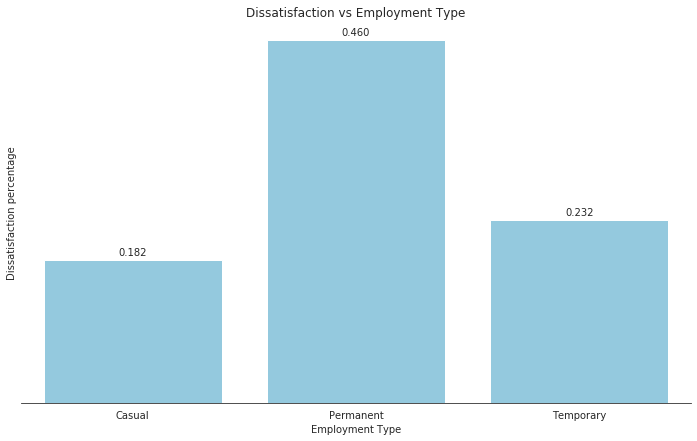

In [55]:
plt.figure(figsize=(12,7))
sns.set_style('white')
splt = sns.barplot(
    x='employment_catg',
    y='dissatisfied',
    data=emp_status_catg,
    color='skyblue'
)
plt.yticks([])
plt.xticks(rotation=0)
plt.xlabel("Employment Type")
plt.ylabel("Dissatisfaction percentage")
plt.title("Dissatisfaction vs Employment Type")
for loc in ['left','right','top']:
    plt.gca().spines[loc].set_visible(False)
for p in splt.patches:
    splt.annotate(format(p.get_height(),'.3f'),
                  (p.get_x()+p.get_width()/2,p.get_height()+0.01),
                  ha='center', 
                  va='center'
                 )
#splt.annote("bar text",(loc_x,loc_y),ha(horizontal allign),va(vertical allign))


The conclusion from the resulting plot:-

* Employees of 'Permanent' status are likely to resign due to dissatisfaction.
* Employees of the 'Casual' and 'Temporary' status have lesser likelihood as compared to 'Permanent'.

The next step in analysis, is only to get an idea of sorts whether dissatisfaction is the driving criterion for attrition in these institutes.

In [56]:
dissatisfied_employees = df.dissatisfied.value_counts().reset_index()
dissatisfied_employees['index'] = pd.Series(['Not Dissatisfied','Dissatisfied'])
dissatisfied_employees.set_index('index',inplace=True)
dissatisfied_employees

,dissatisfied
index,
Not Dissatisfied,384
Dissatisfied,228


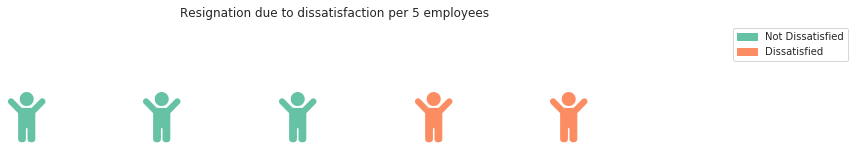

In [65]:
plt.figure(
    figsize=(12,6),
    FigureClass=Waffle,
    rows=1,
    columns=5,
    values=dissatisfied_employees.to_dict()['dissatisfied'],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    icons='child',
    font_size=50,
    title={'label': 'Resignation due to dissatisfaction per 5 employees', 'loc': 'center'}
)
plt.show()

The waffle plot shows the number of resignations due to dissatisfaction per 5 people in the survey. 2 out of 5 people resign due to dissatisfaction. Conclusions drawn are :- 

* Dissatisfaction is not the only reason for resignation
* Other reasons for resignation collectively out weigh dissatisfaction.
* 2 out of 5 people exiting the insitutes resign due to dissatisfaction

The analysis comes to an end here. The final conclusions drawn from the project are :-

* Resignation due to dissatisfaction makes up for only about 37% of the total employees who resigned from these institutes collectively.
* An employee of the following type has more likely resigned due to dissatisfaction:-
    * Established or Veteran service category<br>
        Employee has worked for more than 7 years.
    * Senior or Elder of age<br>
        Employee aged 46 or older.
    * Permanent status<br>
        Employee working full time.
* Young or New employees mostly do not resign due to dissatisfaction.
* Department of Education, Training and Employment (DETE) have higher resignations due to dissatisfaction than the Technical and Further Education (TAFE) institute.